In [23]:
#!pip install opencv-python

In [4]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [5]:
test_img = cv2.imread("Leo/296293048_599576758246408_2633121174738030367_n.jpg", 1)
img_rgb= cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


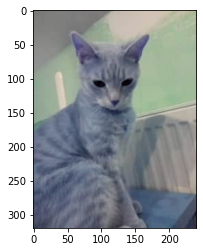

In [6]:
plt.imshow(test_img)

In [7]:
def get_cat_face_rectangle(img, clf):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faceCascade = clf
    detectedFaces = faceCascade.detectMultiScale(img_rgb, 1.1, 4)
    return detectedFaces

In [8]:
os.listdir("Leo")[:2]

['295828931_371929018419822_5654573577439258016_n.jpg',
 '295846117_599432891550555_4188391149734601442_n.jpg']

In [9]:
len(os.listdir("Leo"))+len(os.listdir("Lily"))
    

52

In [10]:
images = []
for img in os.listdir('Leo'):
    curr_img = cv2.imread("Leo/"+img,1)
    #curr_img= cv2.cvtColor(curr_img, cv2.COLOR_BGR2RGB)
    images.append(curr_img)
for img in os.listdir('Lily'):
    curr_img = cv2.imread("Lily/"+img,1)
    #curr_img= cv2.cvtColor(curr_img, cv2.COLOR_BGR2RGB)
    images.append(curr_img)
images.pop(27)

In [11]:
def plot_images(images, nrows=9, ncols=6):
    ax = []
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14),
                            subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i])
    plt.show()

In [12]:
casClf = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')

In [13]:
(x, y, w, h) = get_cat_face_rectangle(images[0], casClf).flatten()

In [14]:
(x, y, w, h)

(71, 69, 92, 92)

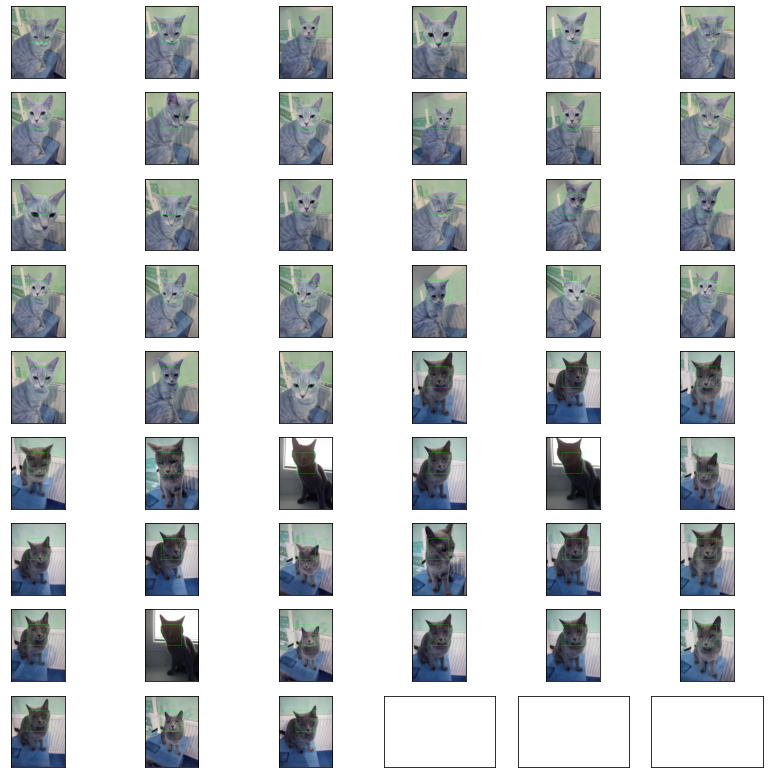

In [15]:
new_images = []
for imag in images:
    (x, y, w, h) = get_cat_face_rectangle(imag, casClf).flatten()
    new_images.append(imag[y-30:y+h+30, x-30:x+w+30].copy())
    cv2.rectangle(imag, (x, y), (x+w, y+h), (0, 255, 0), thickness=1) 
plot_images(images)

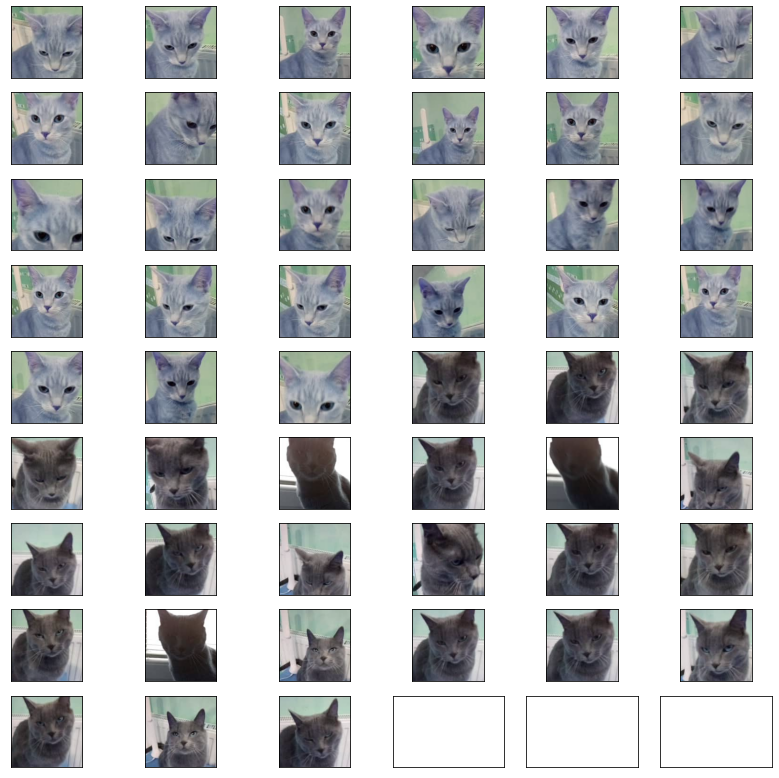

In [16]:
plot_images(new_images)

In [17]:
new_images_fliped = []
for im in new_images:
    new_images_fliped.append(cv2.flip(im, 1))

In [18]:
images_leo = new_images[:27] + new_images_fliped[:27] 
images_lily = new_images[27:] + new_images_fliped[27:] 

In [19]:
images_leo[0].shape

(152, 152, 3)

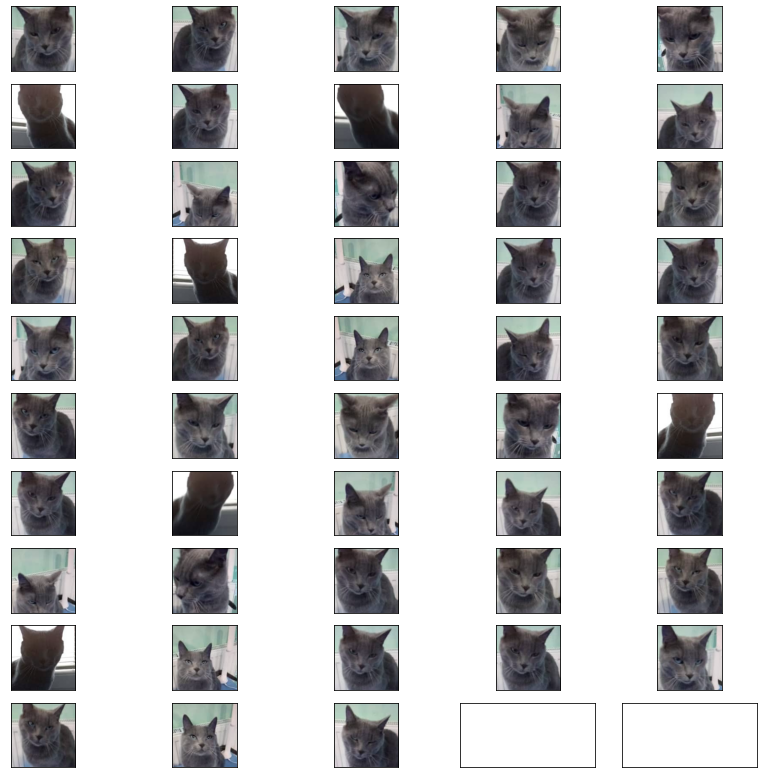

In [20]:
plot_images(images_lily, 10,5)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(152, 152, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
for i in range(len(images_leo)):
    images_leo.append(images_leo[i] + 10)
    images_leo.append(images_leo[i] - 10)
      
for i in range(len(images_lily)):
    images_lily.append(images_lily[i] + 10)
    images_lily.append(images_lily[i] - 10)
       

In [24]:
print(len(images_leo))
print(len(images_lily))
dataset_images = images_leo + images_lily
print(len(dataset_images))

162
144
306


In [25]:
leo_labels = [0 for x in range(162)]
lily_labels = [1 for x in range(144)] 

In [26]:
labels = leo_labels + lily_labels

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dataset_images, labels, train_size=0.8)

1


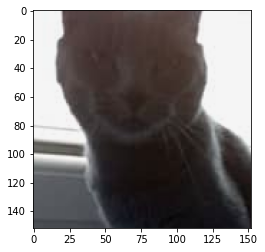

In [28]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
plt.imshow(X_test[1])
print(y_test[1])

In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12, batch_size=5)

Epoch 1/12
49/49 [==============================] - 27s 530ms/step - loss: 16.2482 - accuracy: 0.7418 - val_loss: 0.2450 - val_accuracy: 0.9355
Epoch 2/12
49/49 [==============================] - 25s 504ms/step - loss: 0.3847 - accuracy: 0.9303 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3/12
49/49 [==============================] - 26s 527ms/step - loss: 0.0171 - accuracy: 0.9918 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 4/12
49/49 [==============================] - 27s 560ms/step - loss: 3.7843e-05 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/12
49/49 [==============================] - 24s 481ms/step - loss: 2.0854e-06 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/12
49/49 [==============================] - 17s 347ms/step - loss: 1.3750e-06 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/12
49/49 [==============================] - 19s 384ms/step - loss: 1.0357e-06 - accuracy: 1.0000 - val_loss: 0.0015 - val

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [31]:
model.save("leo_lily_classificator.h5")

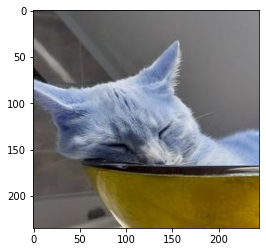

In [32]:
test_leo = cv2.imread("leo_test.jpg")
plt.imshow(test_leo)

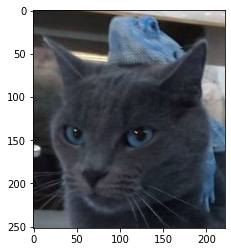

In [33]:
test_lily = cv2.imread("lily_test.jpg")
plt.imshow(test_lily)

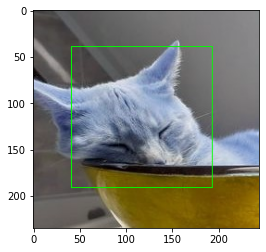

In [34]:
#test_leo = cv2.resize(test_leo, (152,152), interpolation=cv2.INTER_AREA)
(x, y, w, h) = get_cat_face_rectangle(test_leo, casClf).flatten()
cv2.rectangle(test_leo, (x-30, y-30), (x+w+30, y+h+30), (0, 255, 0), thickness=1)
plt.imshow(test_leo)

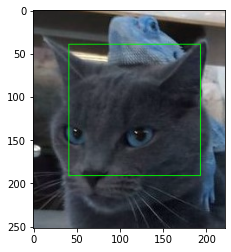

In [35]:
(x, y, w, h) = get_cat_face_rectangle(test_lily, casClf).flatten()
cv2.rectangle(test_lily, (x-30, y-30), (x+w+30, y+h+30), (0, 255, 0), thickness=1)
plt.imshow(test_lily)

In [36]:
resize = cv2.resize(test_leo, (152,152), interpolation=cv2.INTER_AREA)
resize1 = cv2.resize(test_lily, (152,152), interpolation=cv2.INTER_AREA)

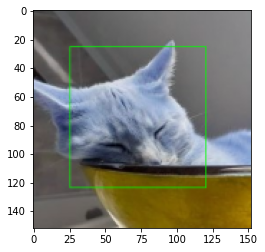

In [37]:
plt.imshow(resize)

In [38]:
resizer = resize.reshape(-1, 152, 152, 3)
resizer1 = resize1.reshape(-1, 152, 152, 3)

In [61]:
def check_prediction(img):
    p = model.predict(img)[0][0]
    if round(p) == 1:
        return "LILY", str(int(round(p, 2)*100))+'%'
    else:
        return "LEO" , str(int(100 - round(p, 2)*100))+'%'
        
label = check_prediction(resizer)
label1 = check_prediction(resizer1)

1/1 [==============================] - 0s 29ms/step


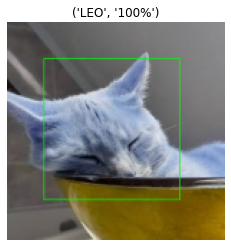

In [62]:
plt.title(label)
plt.axis('off')
plt.imshow(resize)

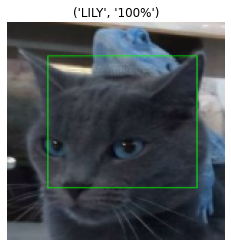

In [63]:
plt.title(label1)
plt.axis('off')
plt.imshow(resize1)